In [1]:
import sys
from pathlib import Path
from src.train.pipeline import run_pipeline
from src.ann.config import ANNConfig
from src.pso.config import PSOConfig

# project root = parent of "notebooks"
PROJECT_ROOT = Path(__file__).resolve().parents[1] if "__file__" in globals() else Path.cwd().parents[0]

# Make sure root is on sys.path so we can import train, pso, etc.
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

PROJECT_ROOT


WindowsPath('C:/university/BC/F21BC-Coursework/src/notebooks/Task 5 - Experiment')

#### **ANN (Fixed)**

In [2]:
# ANN CONFIG
ann_config = ANNConfig(
    input_dim=8,   # 8 features in dataset
    hidden_layers=[
        {"units": 8,  "activation": "relu"}, #Hidden Layer 1
    ],
    output_dim=1,
)


#### **1. Topology - random K informants**

In [4]:
# PSO CONFIG — baseline
pso_config = PSOConfig(
    topology="random_k",
    k_informants=3,
    swarm_size=40,
    iterations=200,
    alpha=0.72,
    beta=1.49,
    gamma=1.49,
    delta=0.0,
    e=1.0,
    bounds=(-2.0, 2.0),
    v_clamp=(-5.0, 5.0),
    rewire_every=None,
    boundary_mode="clip",
    seed=None,
    minimize=True,
)


======== EXPERIMENTAL PIPELINE (10 RUNS) ========

 Run 1/10
[PSO] iter 1/200 gbest=23.085057
[PSO] iter 21/200 gbest=11.566817
[PSO] iter 41/200 gbest=10.101994
[PSO] iter 61/200 gbest=9.805864
[PSO] iter 81/200 gbest=9.777763
[PSO] iter 101/200 gbest=9.773287
[PSO] iter 121/200 gbest=9.771737
[PSO] iter 141/200 gbest=9.766205
[PSO] iter 161/200 gbest=9.763181
[PSO] iter 181/200 gbest=9.733135
[PSO] iter 200/200 gbest=9.731592
   gBest=9.7316 | Train MAE=9.7316 | Test MAE=10.4248

 Run 2/10
[PSO] iter 1/200 gbest=26.894397
[PSO] iter 21/200 gbest=11.233436
[PSO] iter 41/200 gbest=9.534458
[PSO] iter 61/200 gbest=8.889762
[PSO] iter 81/200 gbest=8.821855
[PSO] iter 101/200 gbest=8.798382
[PSO] iter 121/200 gbest=8.792281
[PSO] iter 141/200 gbest=8.787133
[PSO] iter 161/200 gbest=8.785989
[PSO] iter 181/200 gbest=8.783809
[PSO] iter 200/200 gbest=8.777798
   gBest=8.7778 | Train MAE=8.7778 | Test MAE=9.4228

 Run 3/10
[PSO] iter 1/200 gbest=24.948278
[PSO] iter 21/200 gbest=10.332821
[

C:\university\BC\F21BC-Coursework\src\train\pipeline.py:170: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[1, 0, 1, 0.94])


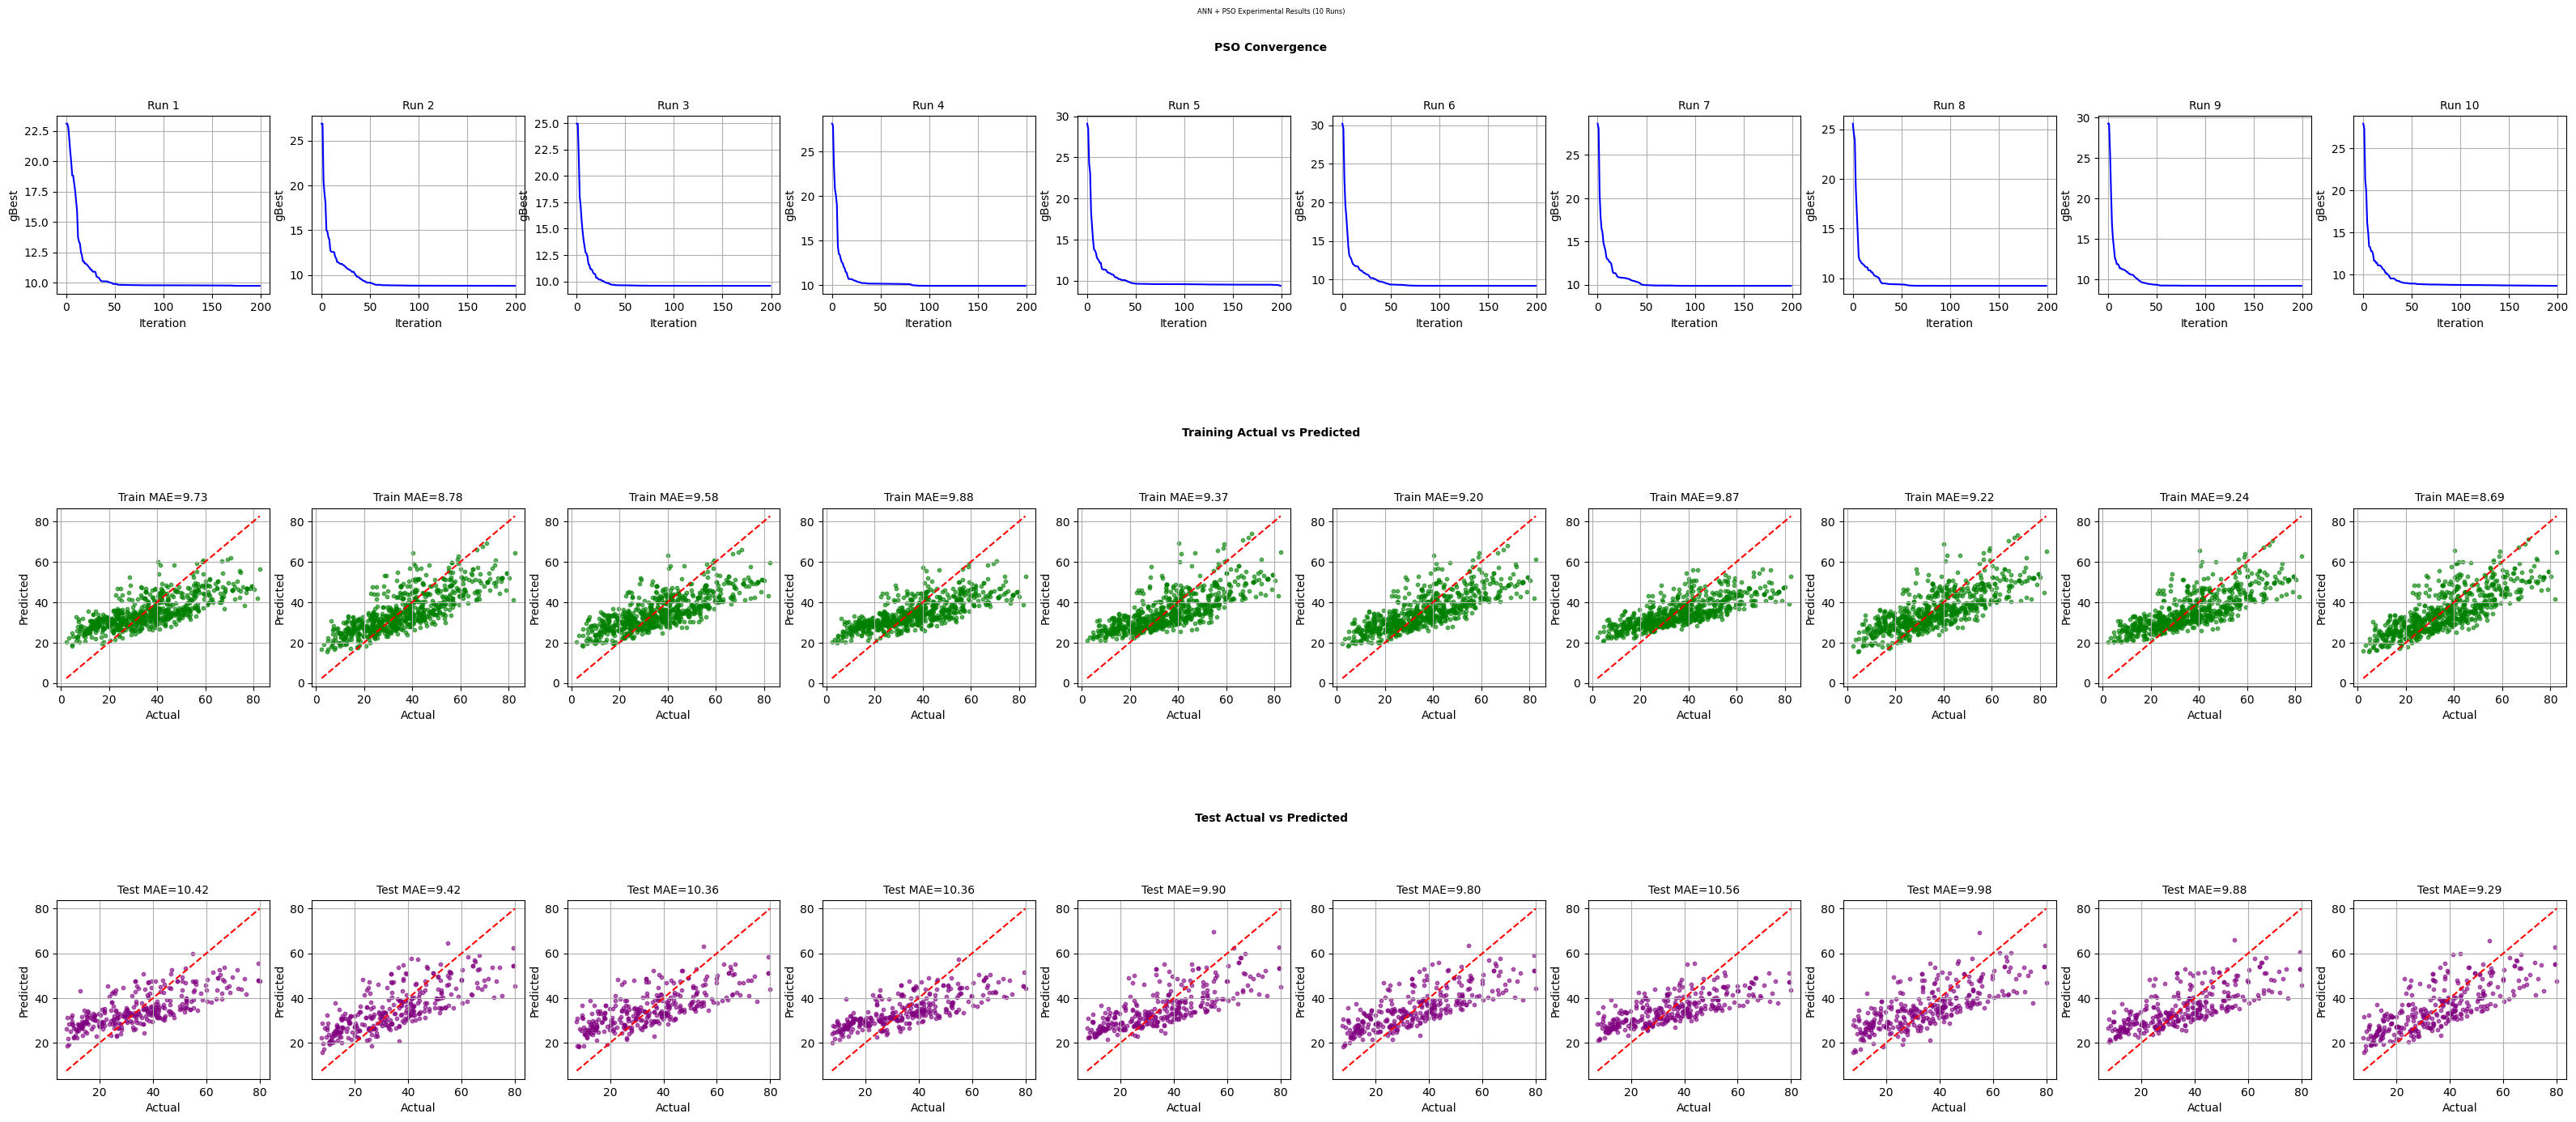


Generating averaged plots across runs...


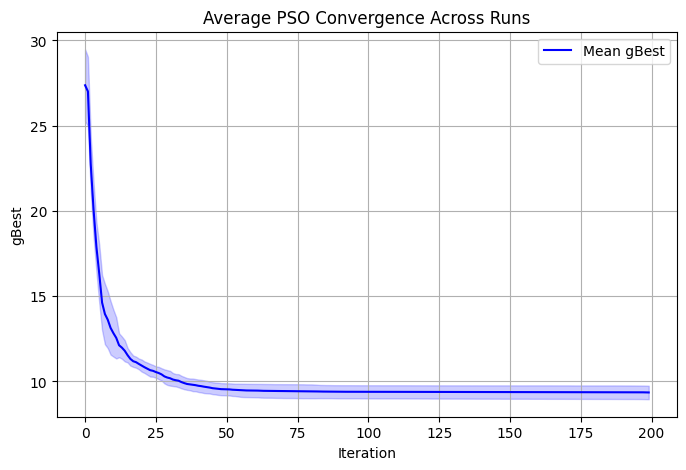

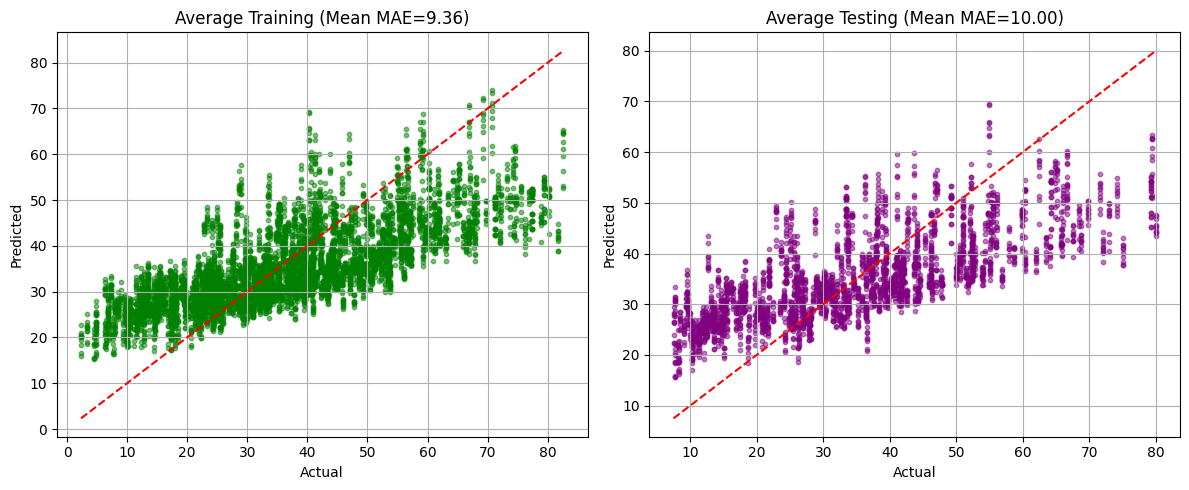

visualization completed.


In [4]:
run_pipeline(ann_config, pso_config,runs=10)

#### **2. Topology - ring Topology**

In [5]:
# PSO CONFIG — baseline
pso_config = PSOConfig(
    topology="ring",        # <-- USE RING TOPOLOGY
    ring_radius=1,
    swarm_size=40,
    iterations=200,
    alpha=0.72,
    beta=1.49,
    gamma=1.49,
    delta=0.0,
    e=1.0,
    bounds=(-5.0, 5.0),
    v_clamp=(-2.0, 2.0),
    k_informants=3, #not use in ring topology
    rewire_every=None,
    boundary_mode="clip",
    seed=None,
    minimize=True,
)


======== EXPERIMENTAL PIPELINE (10 RUNS) ========

 Run 1/10
[PSO] iter 1/200 gbest=13.330759
[PSO] iter 21/200 gbest=10.468430
[PSO] iter 41/200 gbest=8.891485
[PSO] iter 61/200 gbest=8.472673
[PSO] iter 81/200 gbest=8.057577
[PSO] iter 101/200 gbest=7.961198
[PSO] iter 121/200 gbest=7.815518
[PSO] iter 141/200 gbest=7.729312
[PSO] iter 161/200 gbest=7.683158
[PSO] iter 181/200 gbest=7.673785
[PSO] iter 200/200 gbest=7.652698
   gBest=7.6527 | Train MAE=7.6527 | Test MAE=8.3726

 Run 2/10
[PSO] iter 1/200 gbest=14.262041
[PSO] iter 21/200 gbest=9.168796
[PSO] iter 41/200 gbest=8.755839
[PSO] iter 61/200 gbest=8.405810
[PSO] iter 81/200 gbest=8.237576
[PSO] iter 101/200 gbest=8.198475
[PSO] iter 121/200 gbest=8.072867
[PSO] iter 141/200 gbest=7.904367
[PSO] iter 161/200 gbest=7.836505
[PSO] iter 181/200 gbest=7.738392
[PSO] iter 200/200 gbest=7.669262
   gBest=7.6693 | Train MAE=7.6693 | Test MAE=8.4295

 Run 3/10
[PSO] iter 1/200 gbest=13.271504
[PSO] iter 21/200 gbest=9.550211
[PSO]

C:\university\BC\F21BC-Coursework\src\train\pipeline.py:170: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[1, 0, 1, 0.94])


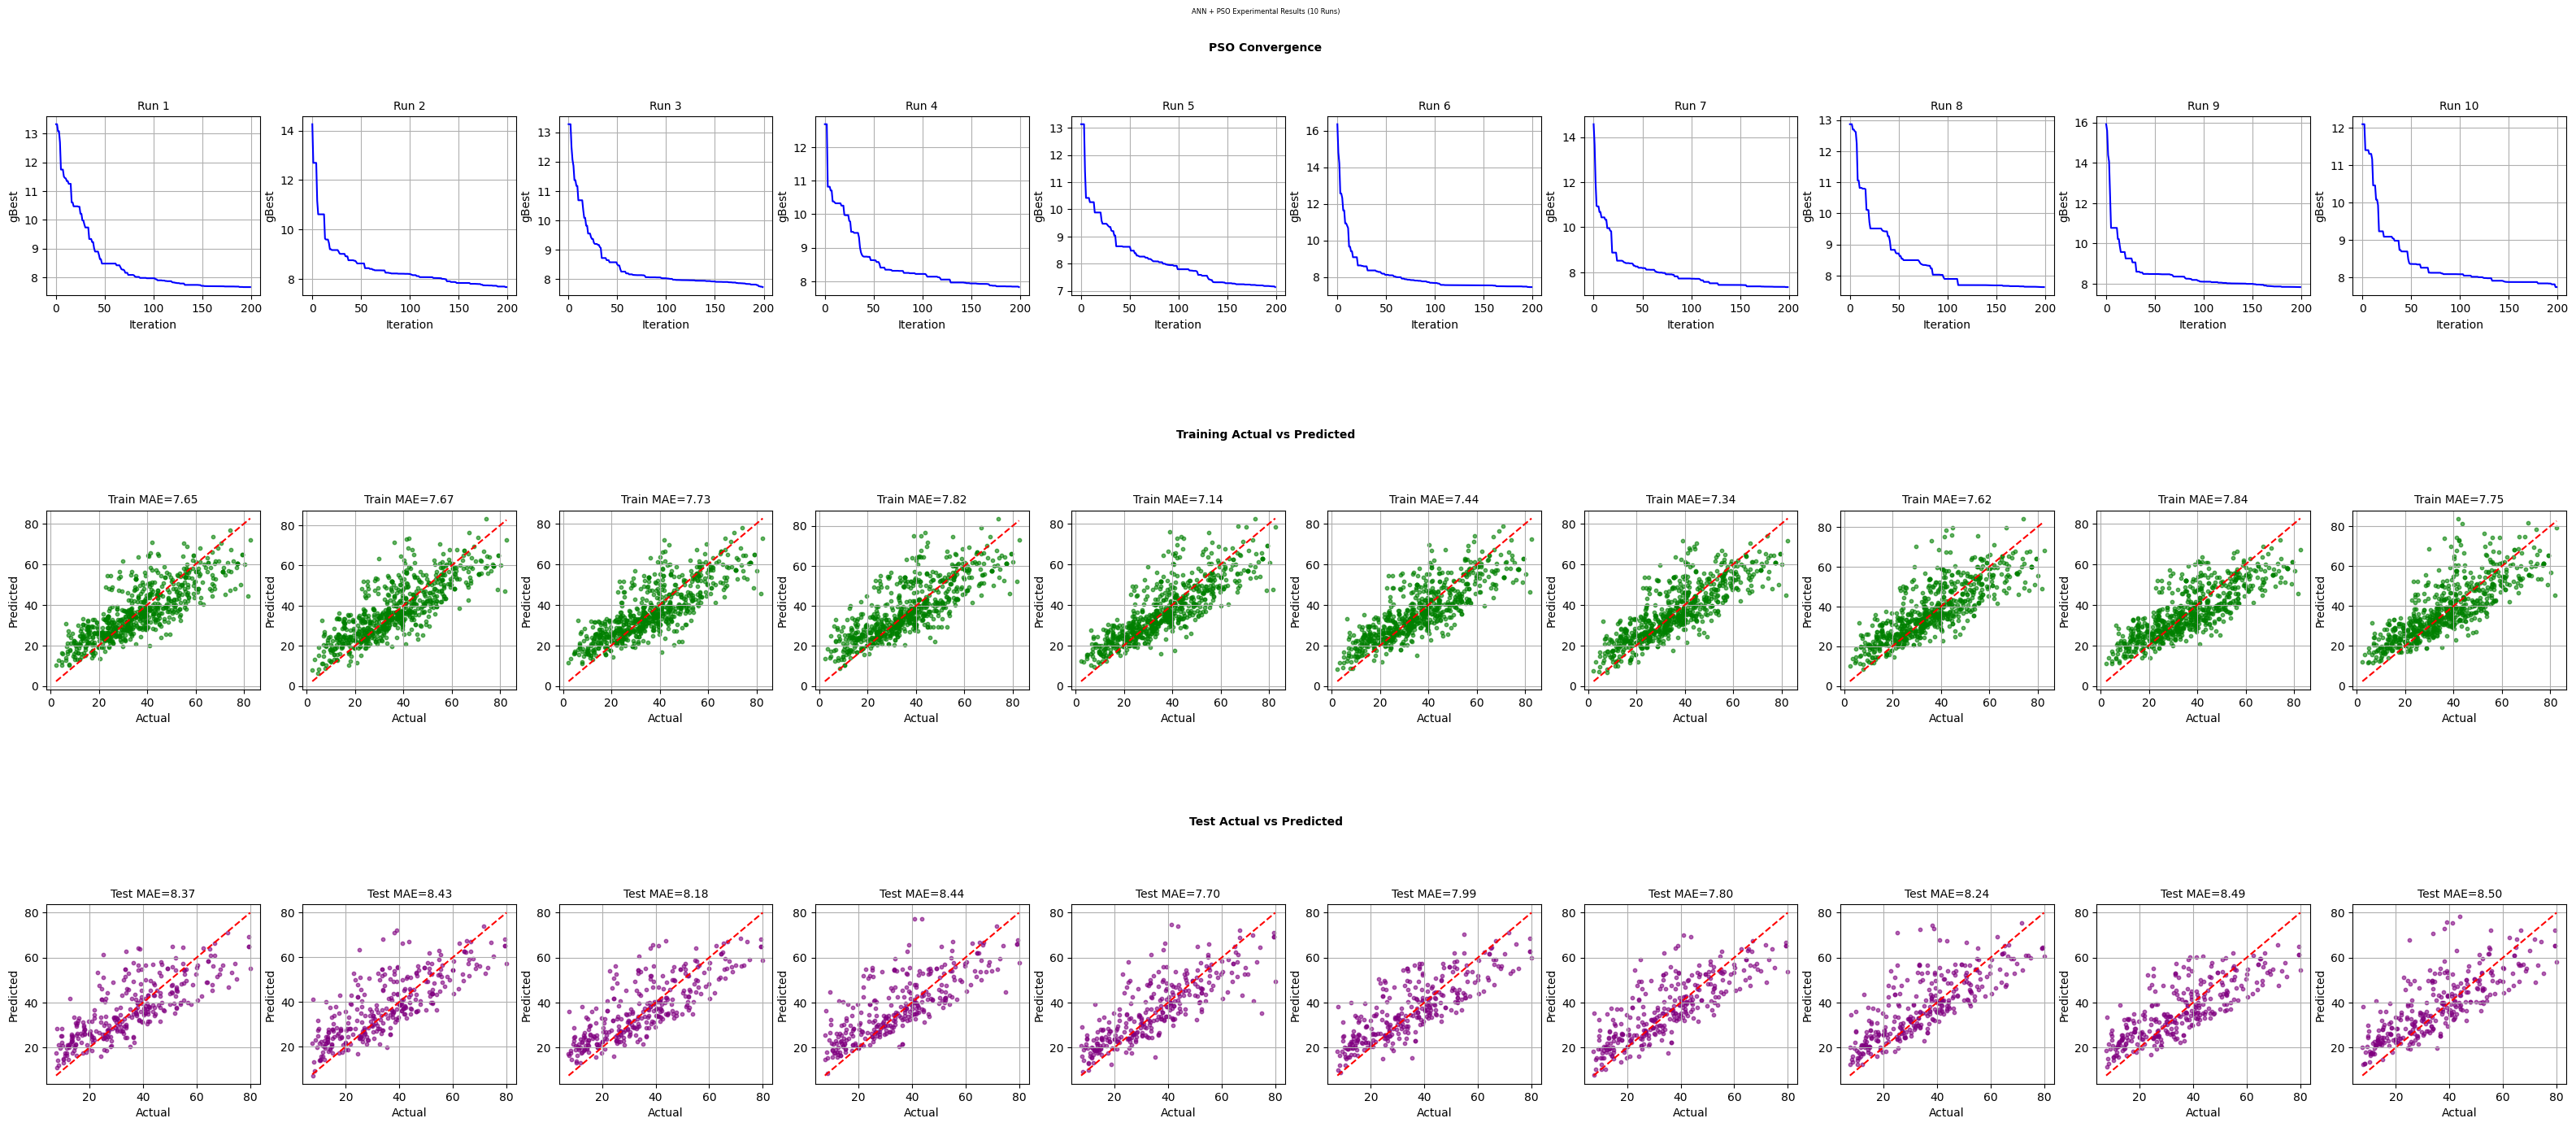


Generating averaged plots across runs...


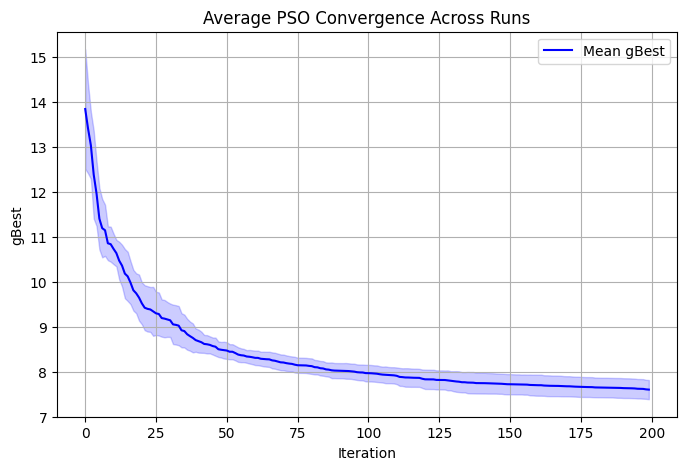

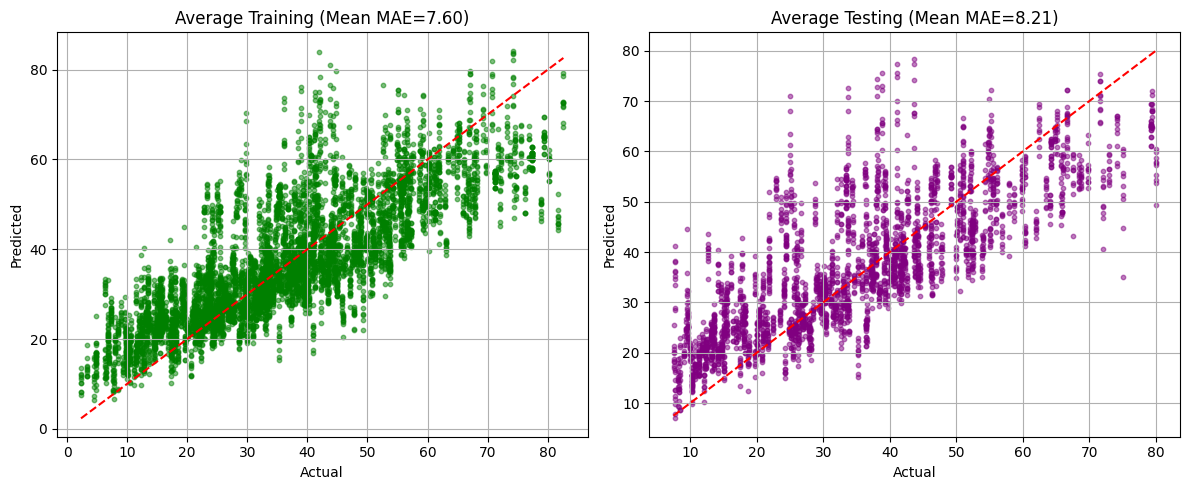

visualization completed.


In [6]:
run_pipeline(ann_config, pso_config,runs=10)

#### **3. Topology - gBest**

In [3]:
# PSO CONFIG — baseline
pso_config = PSOConfig(
    topology="gbest",
    swarm_size=40,
    iterations=200,
    alpha=0.72,
    beta=1.49,
    gamma=1.49,
    delta=0.0,
    e=1.0,
    bounds=(-10.0, 10.0),
    v_clamp=(-1.0, 1.0),
    k_informants=3,
    rewire_every=None,
    boundary_mode="clip",
    seed=None,
    minimize=True,
)


======== EXPERIMENTAL PIPELINE (10 RUNS) ========

 Run 1/10
[PSO] iter 1/200 gbest=17.091189
[PSO] iter 21/200 gbest=9.325229
[PSO] iter 41/200 gbest=8.303428
[PSO] iter 61/200 gbest=8.116057
[PSO] iter 81/200 gbest=7.833482
[PSO] iter 101/200 gbest=7.830519
[PSO] iter 121/200 gbest=7.812914
[PSO] iter 141/200 gbest=7.766885
[PSO] iter 161/200 gbest=7.636483
[PSO] iter 181/200 gbest=7.512737
[PSO] iter 200/200 gbest=7.479962
   gBest=7.4800 | Train MAE=7.4800 | Test MAE=7.8219

 Run 2/10
[PSO] iter 1/200 gbest=24.845064
[PSO] iter 21/200 gbest=11.254213
[PSO] iter 41/200 gbest=9.363907
[PSO] iter 61/200 gbest=8.549470
[PSO] iter 81/200 gbest=8.269452
[PSO] iter 101/200 gbest=8.078411
[PSO] iter 121/200 gbest=7.930692
[PSO] iter 141/200 gbest=7.849931
[PSO] iter 161/200 gbest=7.680509
[PSO] iter 181/200 gbest=7.399735
[PSO] iter 200/200 gbest=7.259970
   gBest=7.2600 | Train MAE=7.2600 | Test MAE=7.7167

 Run 3/10
[PSO] iter 1/200 gbest=21.083546
[PSO] iter 21/200 gbest=9.772433
[PSO]

C:\university\BC\F21BC-Coursework\src\train\pipeline.py:170: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[1, 0, 1, 0.94])


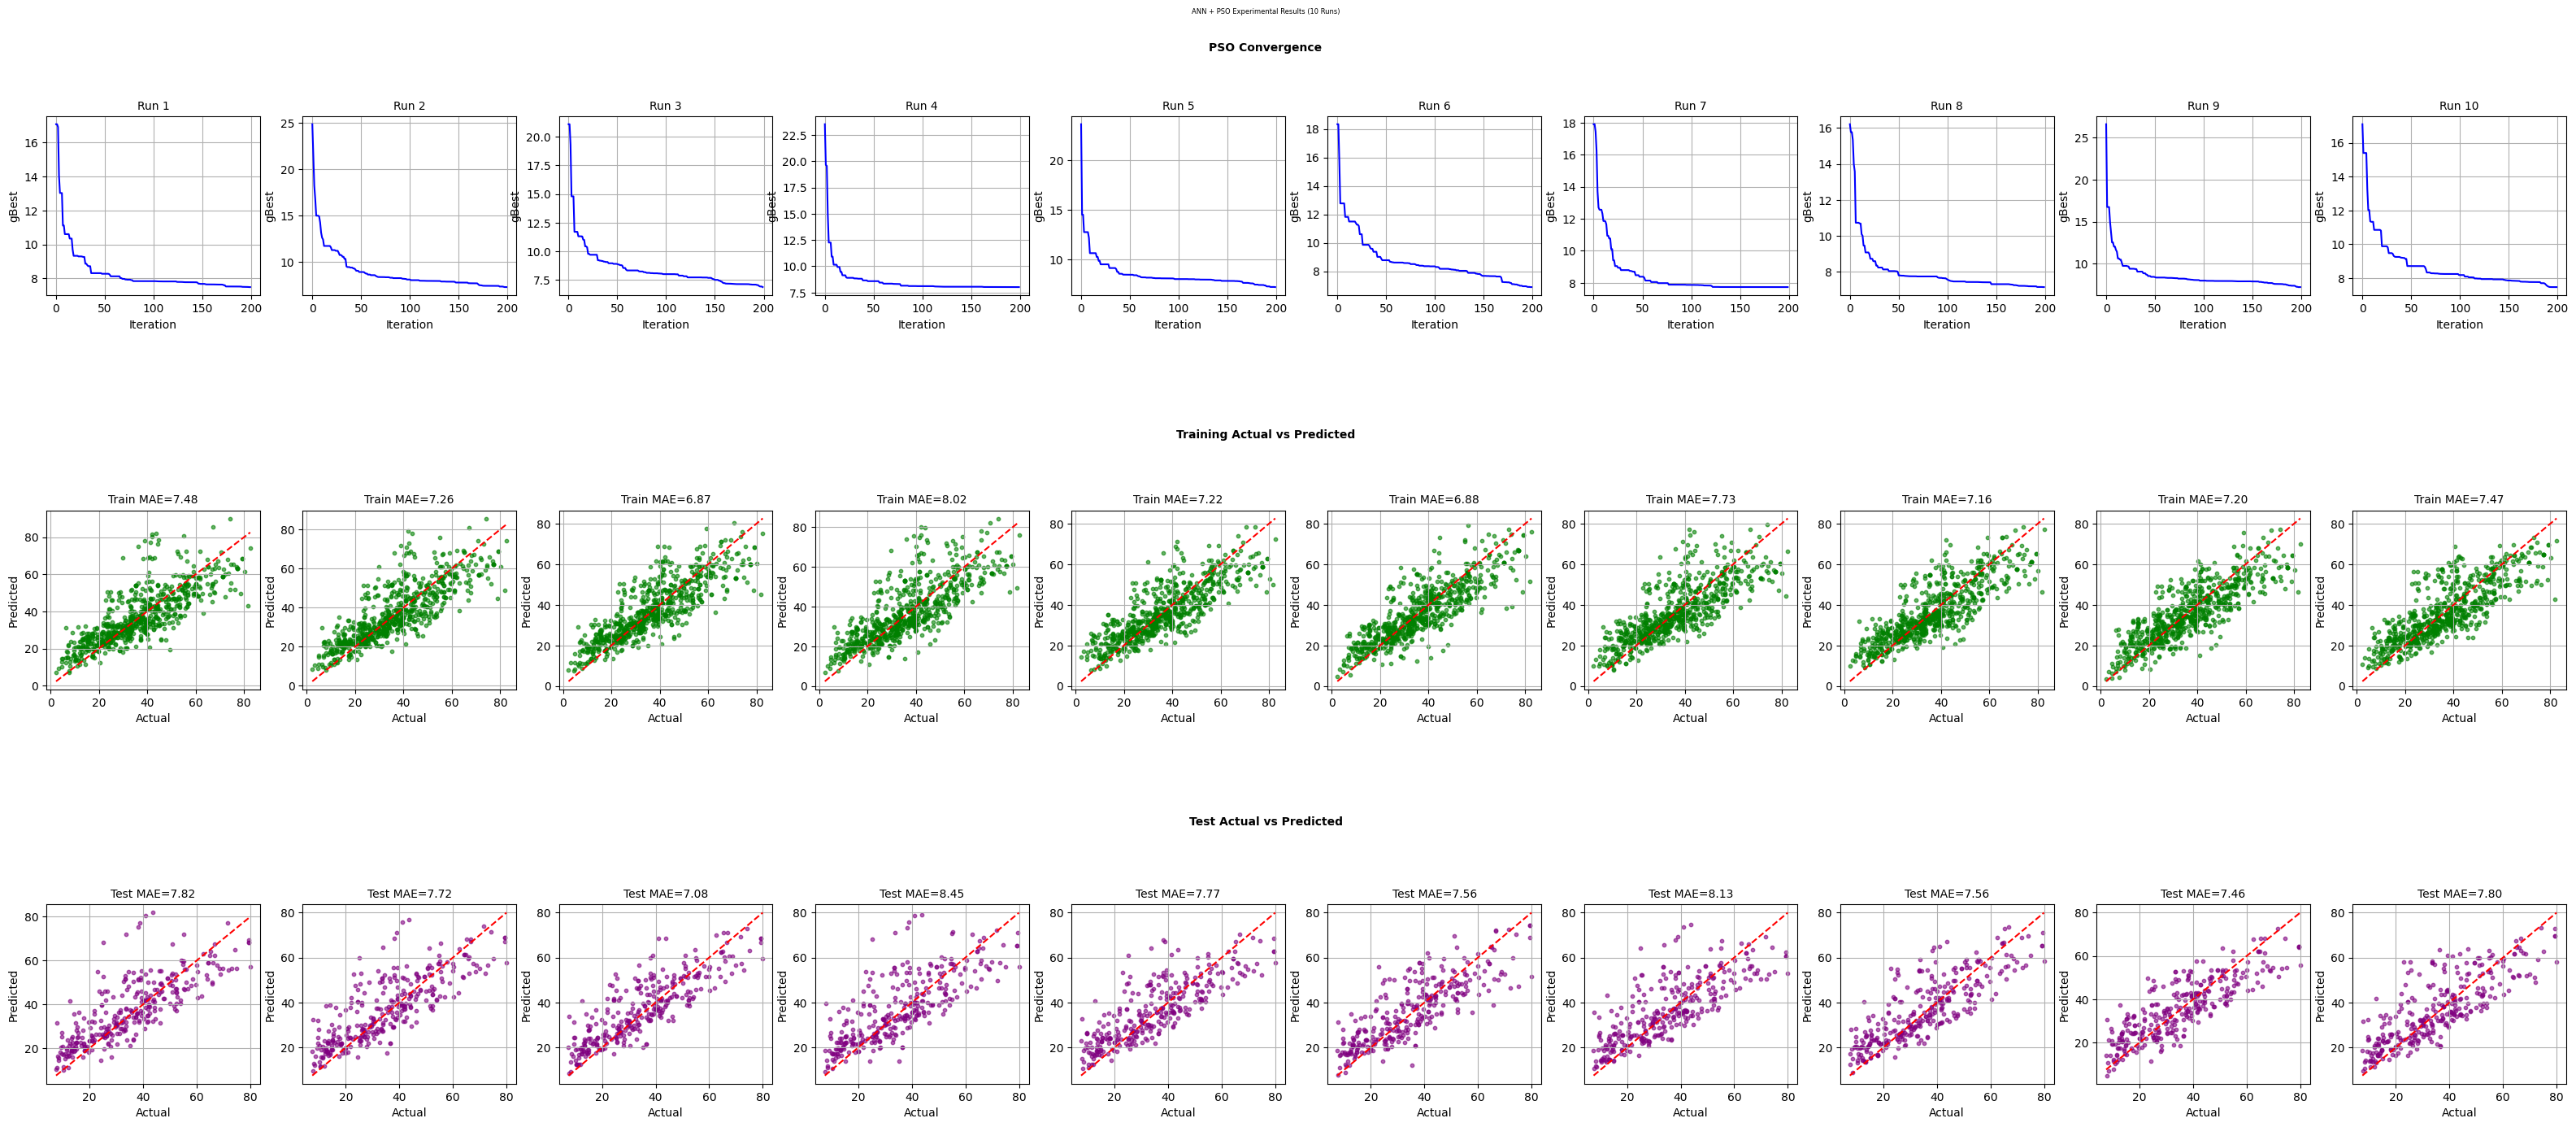


Generating averaged plots across runs...


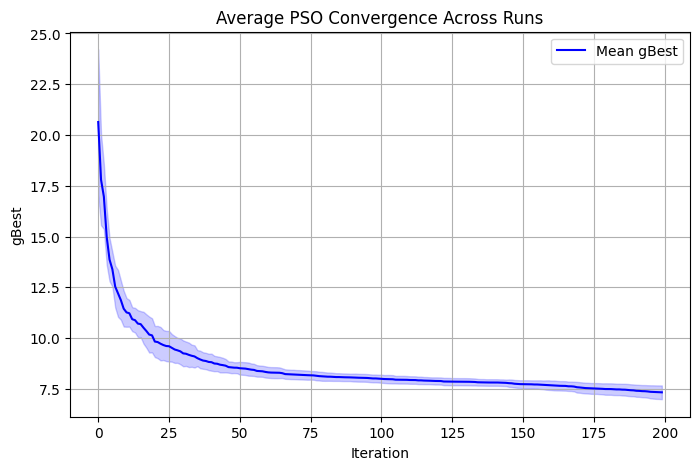

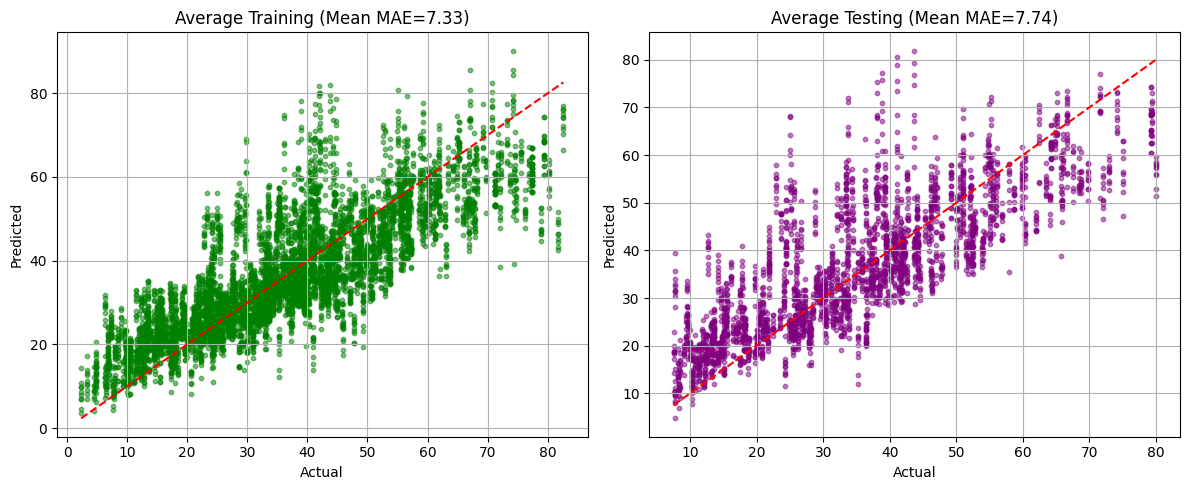

visualization completed.


In [4]:
run_pipeline(ann_config, pso_config,runs=10)

#### **4. Topology - Fully Random**

In [5]:
# PSO CONFIG — baseline
pso_config = PSOConfig(
    topology="fully_random",
    swarm_size=40,
    iterations=200,
    alpha=0.72,
    beta=1.49,
    gamma=1.49,
    delta=0.0,
    e=1.0,
    bounds=(-10.0, 10.0),
    v_clamp=(-1.0, 1.0),
    k_informants=3,
    rewire_every=None,
    boundary_mode="clip",
    seed=None,
    minimize=True,
)


======== EXPERIMENTAL PIPELINE (10 RUNS) ========

 Run 1/10
[PSO] iter 1/200 gbest=25.314323
[PSO] iter 21/200 gbest=9.020845
[PSO] iter 41/200 gbest=8.265280
[PSO] iter 61/200 gbest=8.255732
[PSO] iter 81/200 gbest=8.048015
[PSO] iter 101/200 gbest=8.024923
[PSO] iter 121/200 gbest=7.987982
[PSO] iter 141/200 gbest=7.970406
[PSO] iter 161/200 gbest=7.956966
[PSO] iter 181/200 gbest=7.939161
[PSO] iter 200/200 gbest=7.915788
   gBest=7.9158 | Train MAE=7.9158 | Test MAE=8.3868

 Run 2/10
[PSO] iter 1/200 gbest=19.067760
[PSO] iter 21/200 gbest=9.809158
[PSO] iter 41/200 gbest=8.960600
[PSO] iter 61/200 gbest=8.512034
[PSO] iter 81/200 gbest=8.359320
[PSO] iter 101/200 gbest=8.100359
[PSO] iter 121/200 gbest=8.010391
[PSO] iter 141/200 gbest=7.989549
[PSO] iter 161/200 gbest=7.988847
[PSO] iter 181/200 gbest=7.888428
[PSO] iter 200/200 gbest=7.389967
   gBest=7.3900 | Train MAE=7.3900 | Test MAE=8.1711

 Run 3/10
[PSO] iter 1/200 gbest=20.531995
[PSO] iter 21/200 gbest=8.813290
[PSO] 

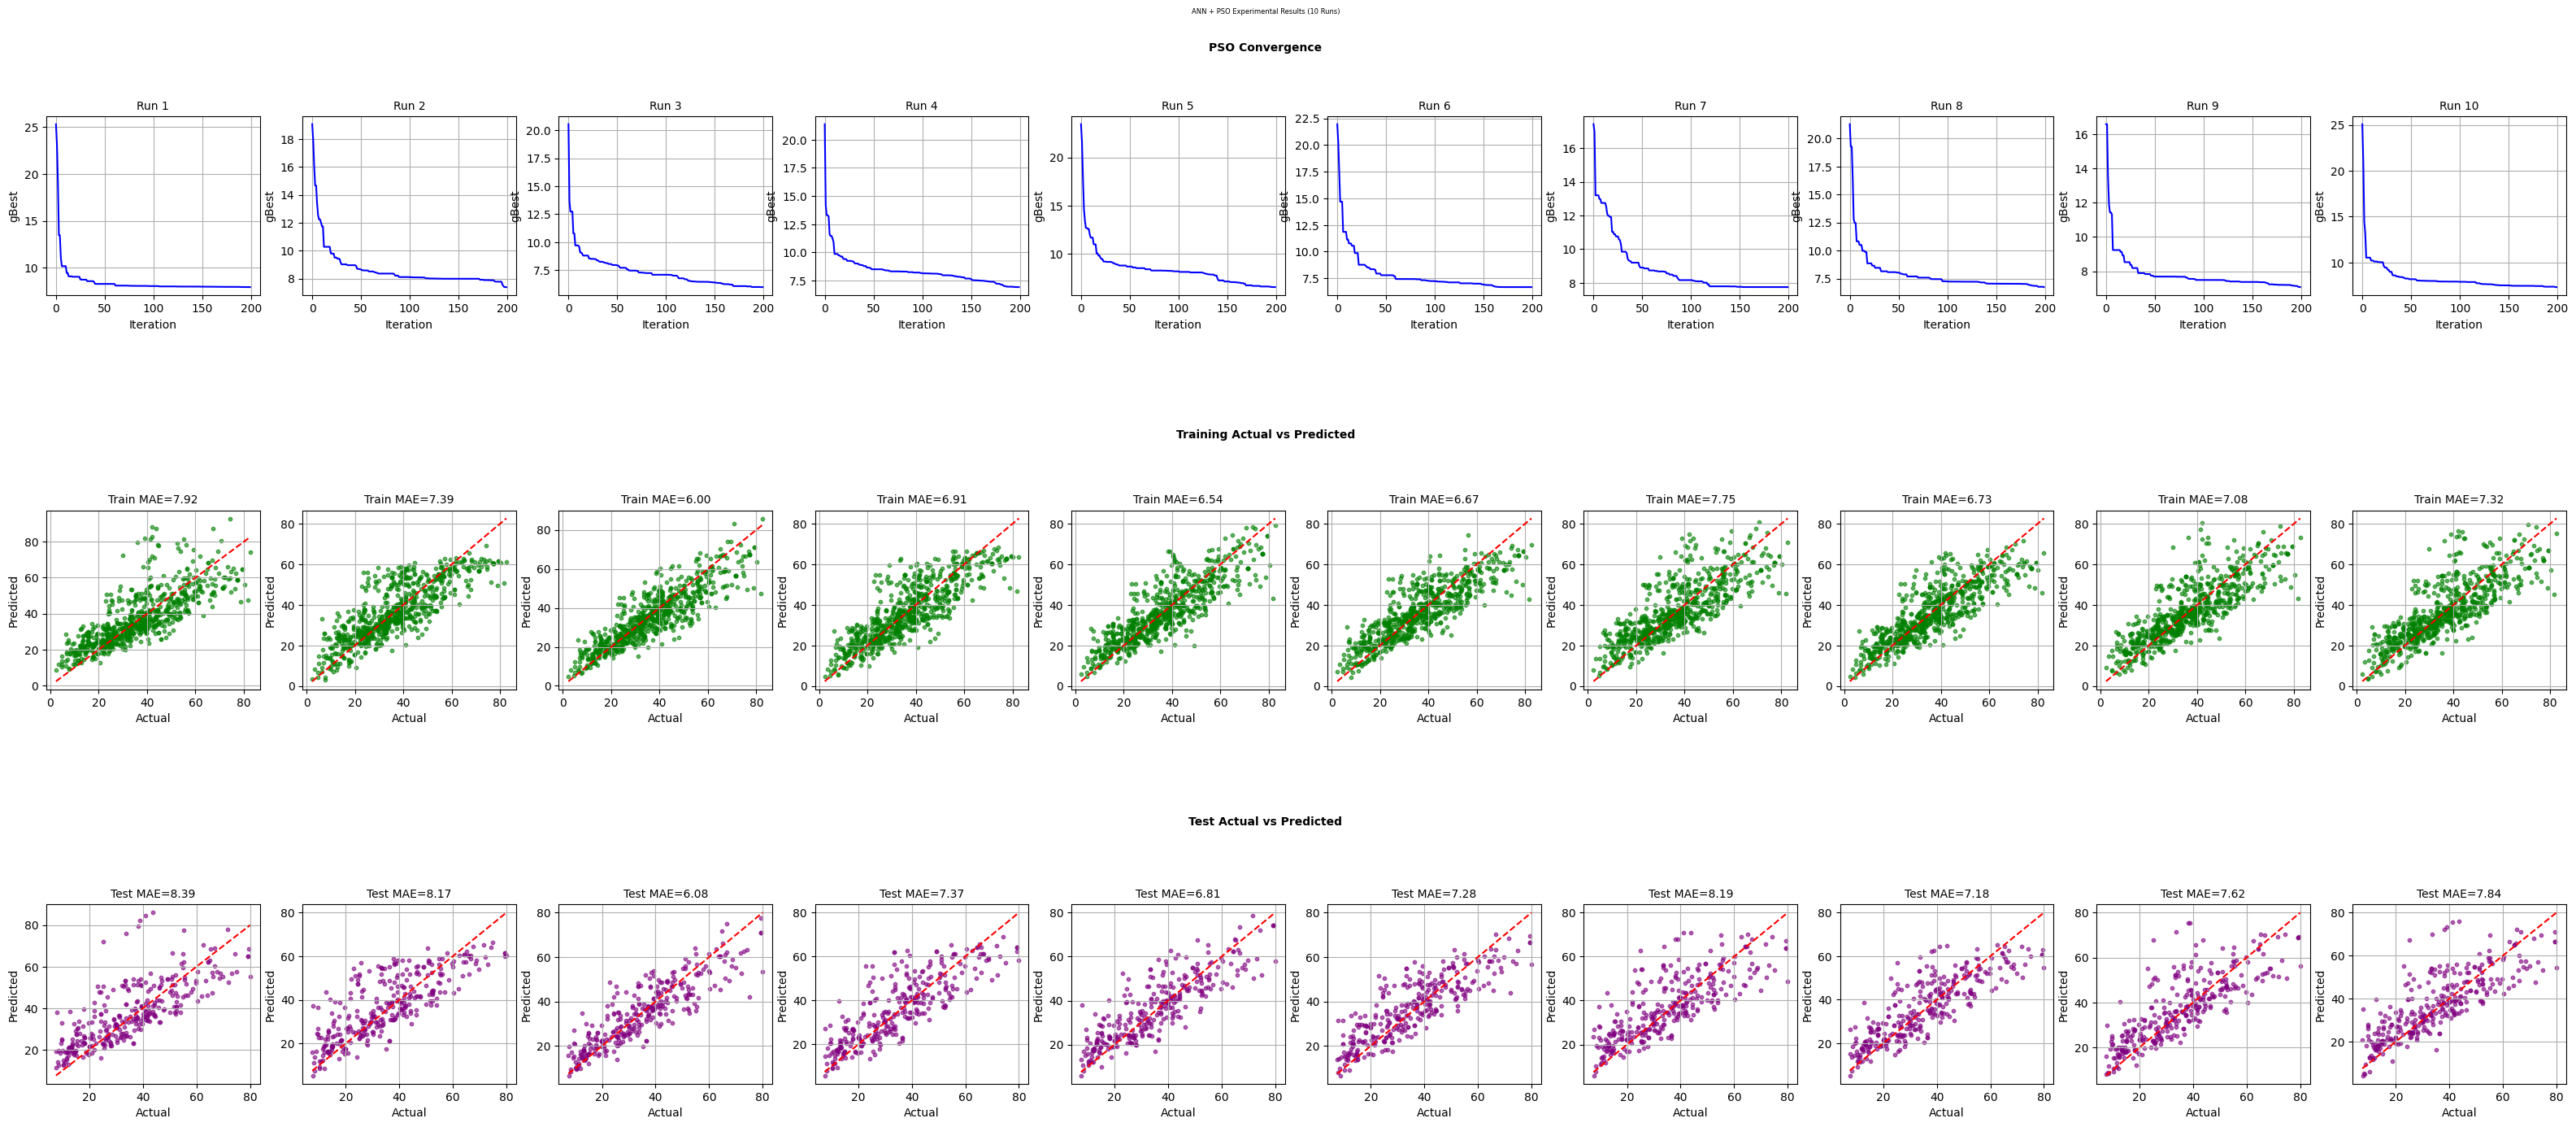


Generating averaged plots across runs...


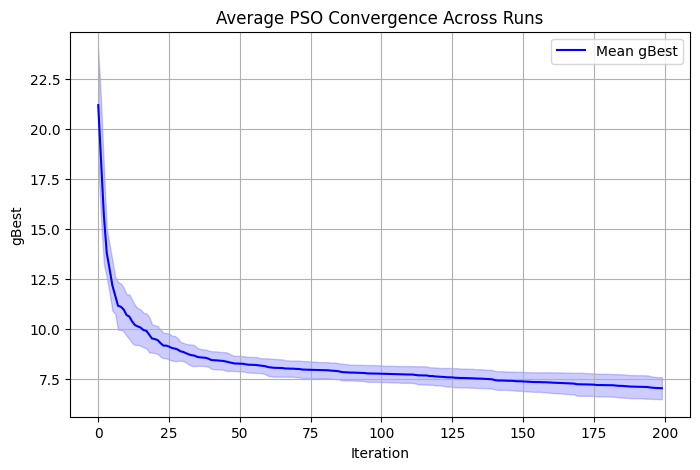

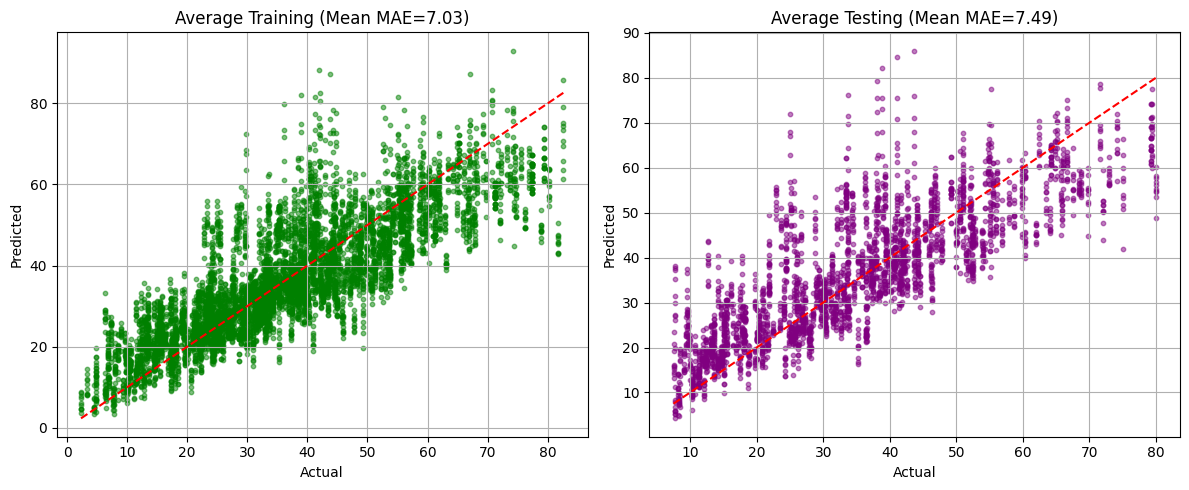

visualization completed.


In [6]:
run_pipeline(ann_config, pso_config,runs=10)